### Note: Never addressed outliers in EDA, maybe filter outliers more than two standard deviations from the mean?

### Note: Review Appropriateness of using Yeo-Johnson Transformation of skewed data.

# Pre-Processing & Feature Engineering

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [64]:
df = pd.read_csv('data/post_EDA_data.csv')

In [65]:
df.head()

,Player,TEAM,College,Country,MIN_2017,MIN_2018,AGE,Height,Weight,Draft_Number,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,FGM_20_24ft,FG%_20_24ft,FGM_25_29ft,FG%_25_29ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE,PIE,cluster_five,cluster_ten
0,Aaron Gordon,ORL,Arizona,USA,32.9,33.8,22,81.0,220,4,58,19,39,17.6,6.5,33.6,2.7,69.8,1.8,1.0,0.8,1.9,34.1,17,0,-1.6,7.0,93.0,85.2,23.9,33.5,0.7,61.1,6.0,40.2,32.5,0.2,2.7,6.6,1.9,1.4,42.9,57.1,0.07,4.7,1.8,3.2,66.7,0.2,20.0,0.4,35.7,0.5,29.8,0.7,35.3,1.4,33.5,14.4,63.2,2.3,37.1,2.2,42.4,2.5,42.4,3.7,40.3,3.8,33.9,108.3,-2.0,11.1,4.4,19.1,50.0,53.0,23.8,100.43,11.3,3,3
1,Abdel Nader,BOS,Iowa State,Egypt,10.9,11.4,24,78.0,230,58,48,33,15,3.0,1.0,35.4,0.5,59.0,0.7,0.3,0.2,0.9,6.5,0,0,-2.3,17.5,82.5,92.0,12.0,29.6,0.2,62.3,7.0,8.7,9.1,0.1,0.7,8.6,0.3,0.7,38.9,61.1,0.00,1.5,1.3,0.4,40.4,0.1,20.0,0.0,20.0,0.0,0.0,0.3,38.7,0.3,32.4,4.2,59.8,0.5,26.8,0.6,41.9,0.8,42.2,1.3,43.1,1.7,39.8,107.3,-10.3,7.8,2.4,11.1,41.3,43.9,16.2,100.46,3.3,0,1
2,Al Horford,BOS,Florida,Dominican Rep...,31.6,29.0,32,82.0,245,3,72,47,25,12.9,5.1,42.9,1.3,78.3,1.8,0.6,1.1,1.9,32.0,15,0,4.8,7.3,92.7,90.4,33.3,33.9,0.6,60.6,6.4,48.9,42.9,0.3,5.1,10.4,6.5,1.3,52.6,47.4,0.00,8.8,3.5,1.9,67.5,0.8,40.7,0.5,37.3,0.4,49.2,0.5,39.5,1.0,44.1,11.5,59.8,1.8,33.9,1.8,36.0,2.4,35.7,3.4,41.2,3.5,29.8,101.6,7.3,22.5,4.7,17.8,55.3,57.5,18.3,97.23,13.4,1,3
3,Al-Farouq Aminu,POR,Wake Forest,USA,30.0,28.3,27,81.0,220,8,69,40,29,9.3,3.3,36.9,0.9,73.8,1.1,1.1,0.6,2.0,24.3,9,0,3.2,16.2,83.8,88.5,40.5,29.1,0.7,62.4,5.9,25.0,19.1,0.2,1.6,6.3,3.5,2.2,42.4,57.6,0.00,5.7,3.0,1.2,58.9,0.2,24.5,0.0,16.7,0.0,11.1,1.0,41.3,0.8,31.8,10.3,54.1,2.3,43.3,2.1,38.5,2.6,43.6,3.5,39.5,3.4,36.8,104.4,5.2,5.6,4.5,19.8,50.3,52.2,14.5,98.47,9.0,1,3
4,Alan Williams,PHX,Cal-Santa Barbara,USA,14.1,5.1,25,80.0,265,61,5,1,4,4.0,1.4,0.0,1.2,66.7,1.4,1.0,0.2,2.6,13.9,0,0,0.2,11.8,88.2,87.5,37.5,27.3,0.0,45.8,4.0,17.6,15.6,0.0,2.0,11.4,4.0,1.0,0.0,100.0,0.00,1.2,1.0,0.8,57.1,0.6,37.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,44.7,1.0,45.5,0.8,50.0,0.8,36.4,1.2,54.5,1.4,26.9,90.8,0.1,19.5,3.9,26.0,38.9,45.5,18.4,97.25,8.9,0,4


### For the time being I'm am going to drop College, County (and mayber TEAM as well later) as it will make and unnecessary number of dummy variables.

In [67]:
df2 = df.drop(columns=['Player','College', 'Country'])

# dropping cluster_ten for this iteration of the model as well.

df3 = df2.drop(columns = ['cluster_ten'])

#### Creating Dummy Variables

In [68]:
### Intended to use OneHotEncoder, but it not seem readily accessible to select with columns to convert to dummy variables.
### Will use pd.get_dummies() instead



### For now I am NOT dropping the first variable of my dummy variables
### Still a little confused if one should always drop one to prevent colinearity or if that 
### is only applicable with certain use cases like neural networks.

df3 = pd.get_dummies(df3, columns=['TEAM', 'cluster_five'])

In [86]:
df3.head()

,MIN_2017,MIN_2018,AGE,Height,Weight,Draft_Number,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,FGM_20_24ft,FG%_20_24ft,FGM_25_29ft,FG%_25_29ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE,PIE,TEAM_ATL,TEAM_BKN,TEAM_BOS,TEAM_CHA,TEAM_CHI,TEAM_CLE,TEAM_DAL,TEAM_DEN,TEAM_DET,TEAM_GSW,TEAM_HOU,TEAM_IND,TEAM_LAC,TEAM_LAL,TEAM_MEM,TEAM_MIA,TEAM_MIL,TEAM_MIN,TEAM_NOP,TEAM_NYK,TEAM_OKC,TEAM_ORL,TEAM_PHI,TEAM_PHX,TEAM_POR,TEAM_SAC,TEAM_SAS,TEAM_TOR,TEAM_UTA,TEAM_WAS,cluster_five_0,cluster_five_1,cluster_five_2,cluster_five_3,cluster_five_4
0,32.9,33.8,22,81.0,220,4,58,19,39,17.6,6.5,33.6,2.7,69.8,1.8,1.0,0.8,1.9,34.1,17,0,-1.6,7.0,93.0,85.2,23.9,33.5,0.7,61.1,6.0,40.2,32.5,0.2,2.7,6.6,1.9,1.4,42.9,57.1,0.07,4.7,1.8,3.2,66.7,0.2,20.0,0.4,35.7,0.5,29.8,0.7,35.3,1.4,33.5,14.4,63.2,2.3,37.1,2.2,42.4,2.5,42.4,3.7,40.3,3.8,33.9,108.3,-2.0,11.1,4.4,19.1,50.0,53.0,23.8,100.43,11.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10.9,11.4,24,78.0,230,58,48,33,15,3.0,1.0,35.4,0.5,59.0,0.7,0.3,0.2,0.9,6.5,0,0,-2.3,17.5,82.5,92.0,12.0,29.6,0.2,62.3,7.0,8.7,9.1,0.1,0.7,8.6,0.3,0.7,38.9,61.1,0.00,1.5,1.3,0.4,40.4,0.1,20.0,0.0,20.0,0.0,0.0,0.3,38.7,0.3,32.4,4.2,59.8,0.5,26.8,0.6,41.9,0.8,42.2,1.3,43.1,1.7,39.8,107.3,-10.3,7.8,2.4,11.1,41.3,43.9,16.2,100.46,3.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,31.6,29.0,32,82.0,245,3,72,47,25,12.9,5.1,42.9,1.3,78.3,1.8,0.6,1.1,1.9,32.0,15,0,4.8,7.3,92.7,90.4,33.3,33.9,0.6,60.6,6.4,48.9,42.9,0.3,5.1,10.4,6.5,1.3,52.6,47.4,0.00,8.8,3.5,1.9,67.5,0.8,40.7,0.5,37.3,0.4,49.2,0.5,39.5,1.0,44.1,11.5,59.8,1.8,33.9,1.8,36.0,2.4,35.7,3.4,41.2,3.5,29.8,101.6,7.3,22.5,4.7,17.8,55.3,57.5,18.3,97.23,13.4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30.0,28.3,27,81.0,220,8,69,40,29,9.3,3.3,36.9,0.9,73.8,1.1,1.1,0.6,2.0,24.3,9,0,3.2,16.2,83.8,88.5,40.5,29.1,0.7,62.4,5.9,25.0,19.1,0.2,1.6,6.3,3.5,2.2,42.4,57.6,0.00,5.7,3.0,1.2,58.9,0.2,24.5,0.0,16.7,0.0,11.1,1.0,41.3,0.8,31.8,10.3,54.1,2.3,43.3,2.1,38.5,2.6,43.6,3.5,39.5,3.4,36.8,104.4,5.2,5.6,4.5,19.8,50.3,52.2,14.5,98.47,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,14.1,5.1,25,80.0,265,61,5,1,4,4.0,1.4,0.0,1.2,66.7,1.4,1.0,0.2,2.6,13.9,0,0,0.2,11.8,88.2,87.5,37.5,27.3,0.0,45.8,4.0,17.6,15.6,0.0,2.0,11.4,4.0,1.0,0.0,100.0,0.00,1.2,1.0,0.8,57.1,0.6,37.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,44.7,1.0,45.5,0.8,50.0,0.8,36.4,1.2,54.5,1.4,26.9,90.8,0.1,19.5,3.9,26.0,38.9,45.5,18.4,97.25,8.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


## Analyzing Distribution Explanatory Variables for Normality/skewness

/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


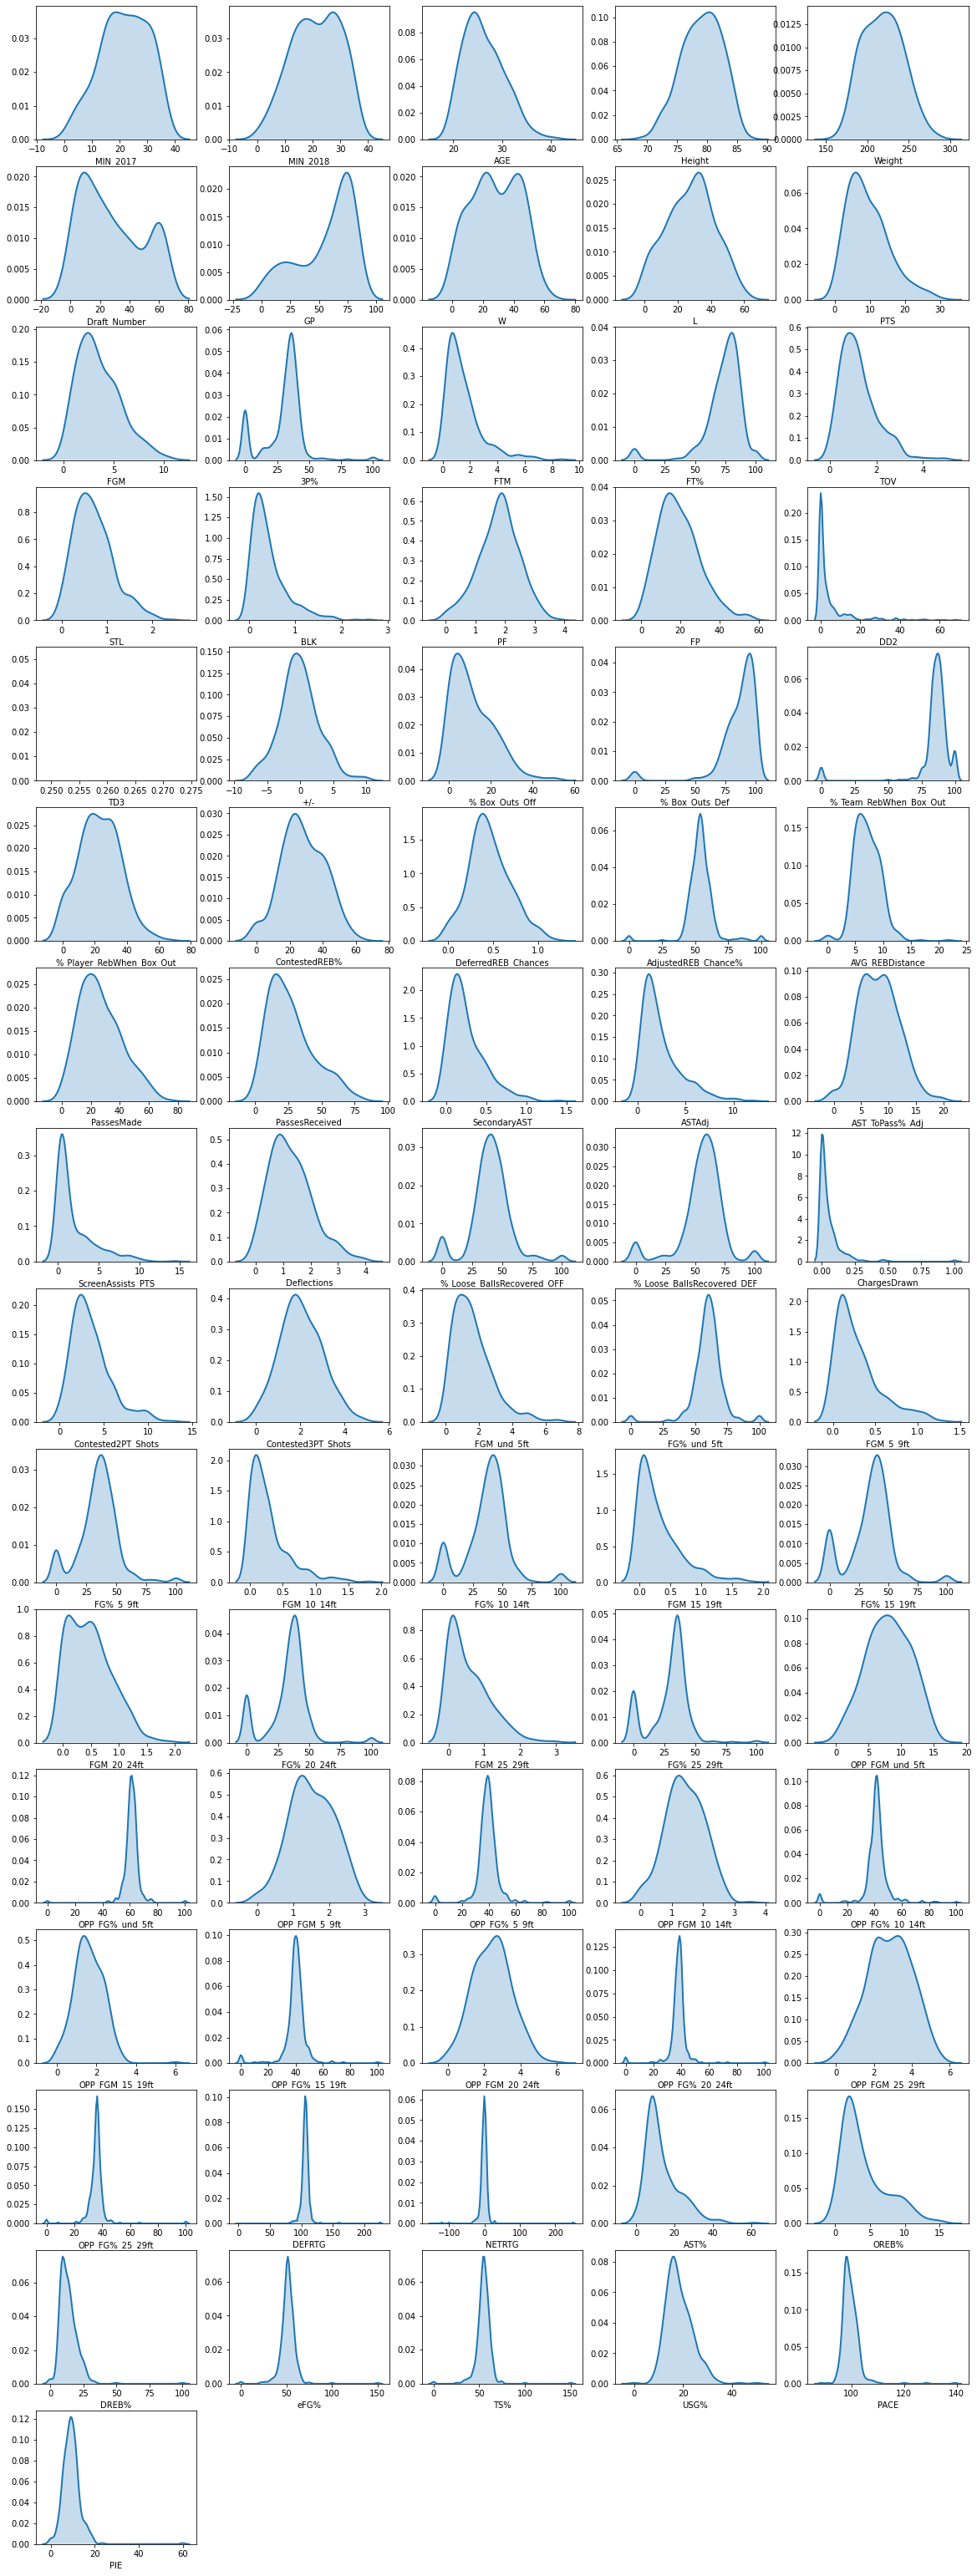

In [103]:
# checking non-normally distributed CDFs, will use boxcox transformation to reshape distributions 
# (could also do logarithmic transformations as well but results are pretty analagous in my experience)

plt.figure(figsize=(20,70))

for i in range(76):
    plt.subplot(20,5,i+1)
    sns.distplot(df3.iloc[:,i], hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 2})
    
plt.show()    


#### Note: the graph of TD3 looks like an error, but represents Triple Doubles, which are uncommon.

### Stablizing Variance with Yeo-Johnson Power Transformation

In [158]:
# Removing the Response Variable so as not to alter it through transformatiions

response_variable = df3.MIN_2018
df3 = df3.drop(columns='MIN_2018')

In [159]:
# Attempted to use Boxcox Transormation on the first 76 columns (not the dummy variable columns)

# Note: boxcox didn't work as there are negative values in the dataframe 
# (I tried to add the min. value of each column but still didn't work)

# Will use the Yeo-Johnson Transformation as it can handle negative values
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html

from scipy.stats import yeojohnson

df_yeoj = df3.copy()

for i in range(75):
    df_yeoj.iloc[:,i] = yeojohnson(df_yeoj.iloc[:,i])[0]

/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


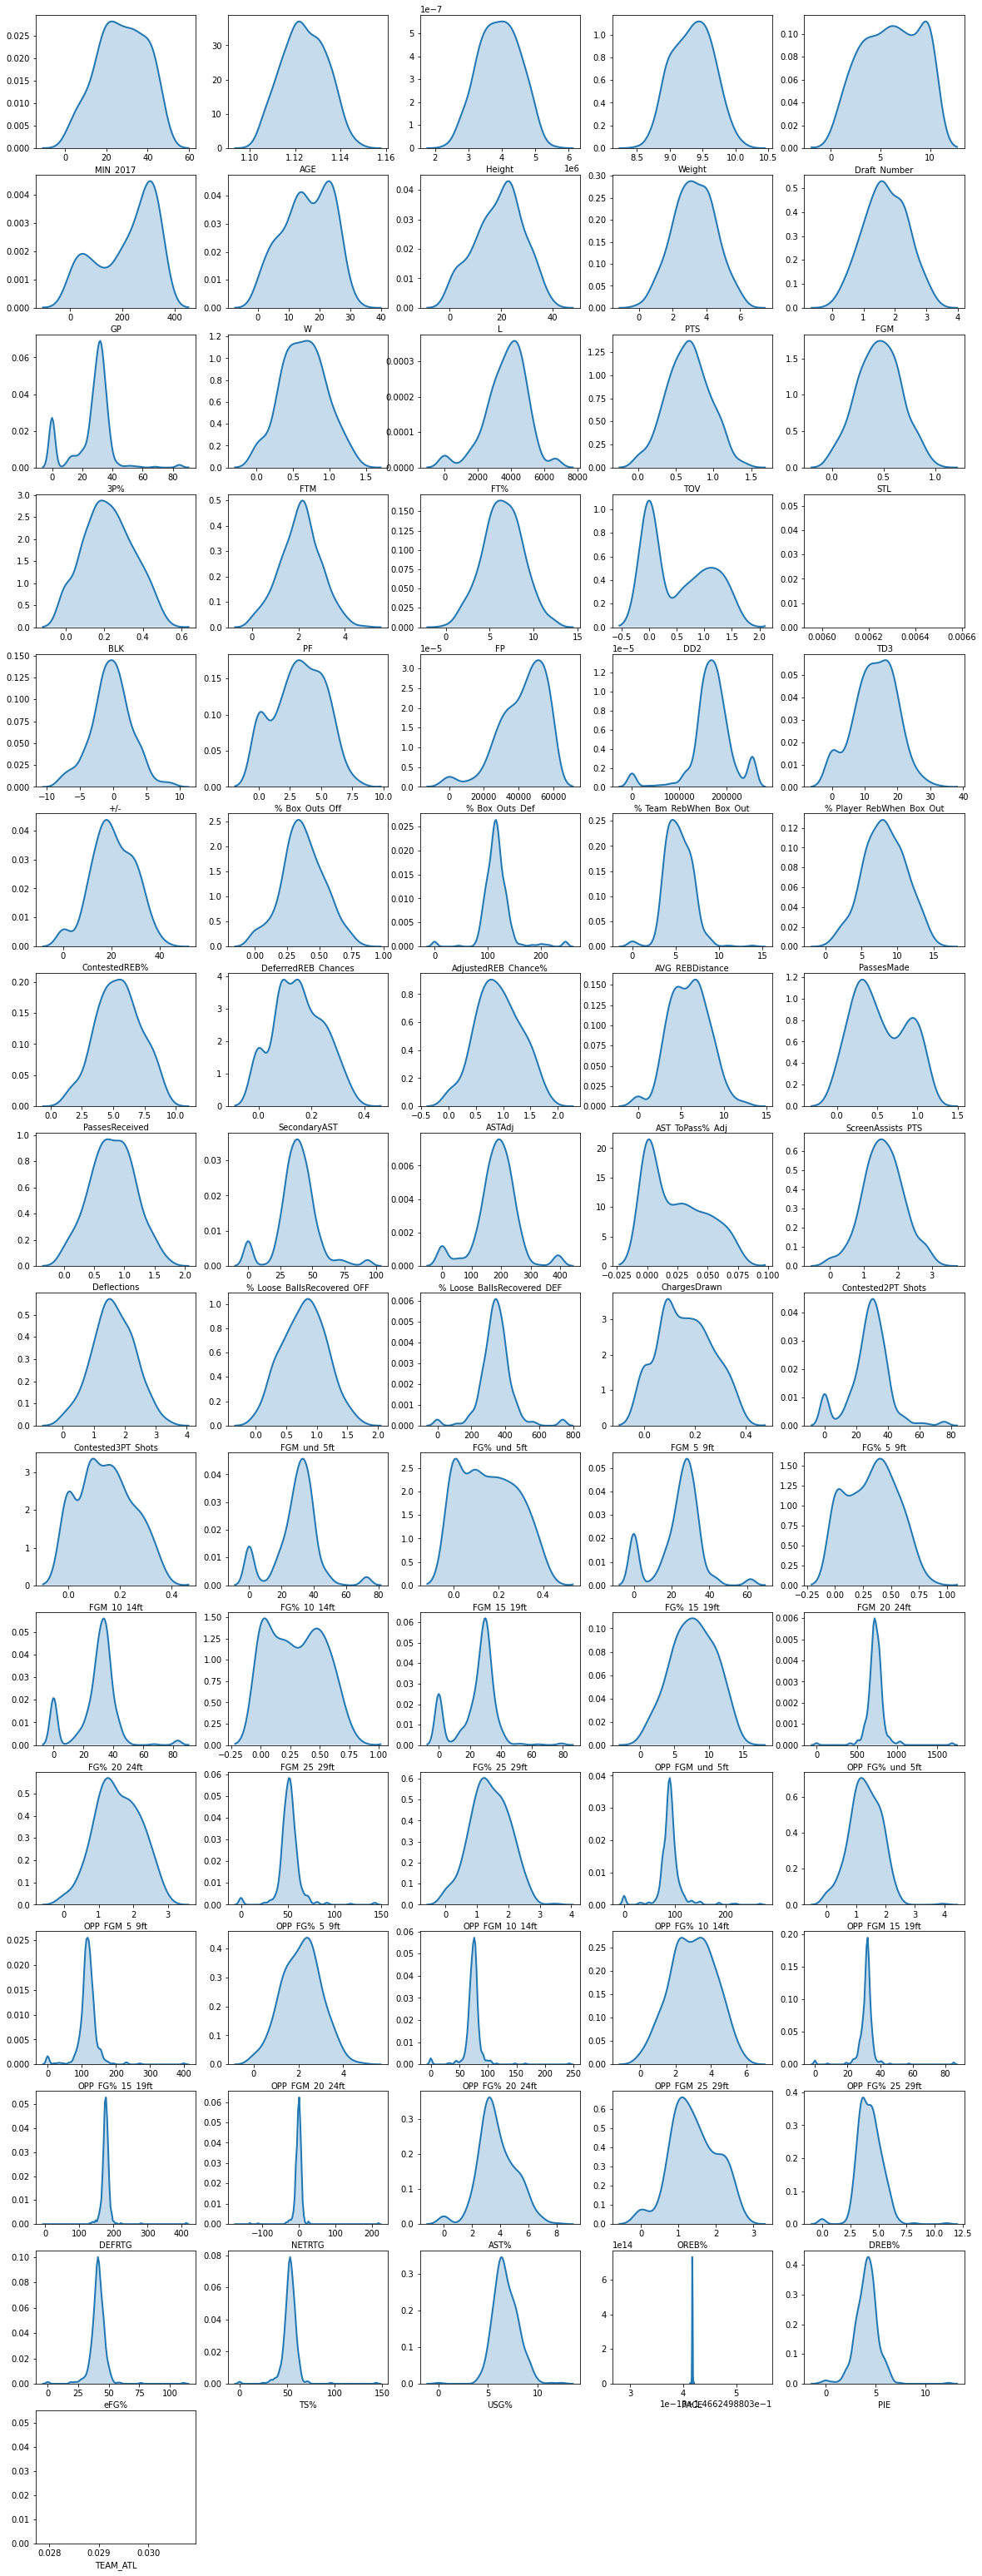

In [160]:
plt.figure(figsize=(20,70))

for i in range(76):
    plt.subplot(20,5,i+1)
    sns.distplot(df_yeoj.iloc[:,i], hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 2})
    
plt.show()  

### Normalizing & Standardizing the Dataframe for More Accurate Model Performance

In [161]:
# setting the mean=0, and standard deviation=1

#### Note here I am using StandardScaler on the dummy variables, uncertain if this is appropriate, will run model 
#### and compare the results in the end.

df4 = StandardScaler().fit_transform(df_yeoj)

In [162]:
df5 = pd.DataFrame(df4, columns= df3.columns)
df5.insert(0,'Player',df.Player)
df5.insert(1, 'MIN_2018', response_variable)

In [163]:
df5.head()

,Player,MIN_2018,MIN_2017,AGE,Height,Weight,Draft_Number,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,FGM_20_24ft,FG%_20_24ft,FGM_25_29ft,FG%_25_29ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE,PIE,TEAM_ATL,TEAM_BKN,TEAM_BOS,TEAM_CHA,TEAM_CHI,TEAM_CLE,TEAM_DAL,TEAM_DEN,TEAM_DET,TEAM_GSW,TEAM_HOU,TEAM_IND,TEAM_LAC,TEAM_LAL,TEAM_MEM,TEAM_MIA,TEAM_MIL,TEAM_MIN,TEAM_NOP,TEAM_NYK,TEAM_OKC,TEAM_ORL,TEAM_PHI,TEAM_PHX,TEAM_POR,TEAM_SAC,TEAM_SAS,TEAM_TOR,TEAM_UTA,TEAM_WAS,cluster_five_0,cluster_five_1,cluster_five_2,cluster_five_3,cluster_five_4
0,Aaron Gordon,33.8,1.319613,-1.109723,0.538935,0.090293,-1.389966,-0.018822,-0.522207,0.783586,1.281991,1.306691,0.242474,1.109479,-0.433056,0.846666,0.789276,1.177116,0.129433,1.304082,1.523958,-0.281346,-0.471972,-0.153911,0.455923,-0.185191,0.145761,0.434354,1.050256,0.657814,-0.461327,0.945298,0.514213,-0.034372,0.480799,-0.415312,0.605949,0.295368,0.146452,-0.008250,0.847211,0.689287,-0.206551,1.316839,0.587133,-0.125581,-0.905937,0.801462,-0.072150,0.913281,-0.202275,0.703892,0.148573,1.367248,0.298941,1.867813,0.312399,1.263953,-0.260209,1.271089,0.069434,1.167362,0.263137,1.155832,0.326729,0.822040,-0.251014,0.198129,-0.014149,-0.089441,0.402647,0.867446,-0.167837,-0.197542,0.981388,0.367994,0.554437,-0.173858,-0.181186,-0.195118,-0.181186,-0.188263,-0.195118,-0.188263,-0.195118,-0.173858,-0.201773,-0.173858,-0.181186,-0.201773,-0.201773,-0.188263,-0.188263,-0.166247,-0.166247,-0.166247,-0.188263,-0.181186,5.751811,-0.201773,-0.195118,-0.188263,-0.181186,-0.166247,-0.195118,-0.201773,-0.181186,-0.534943,-0.701926,-0.158312,1.173843,-0.049507
1,Abdel Nader,11.4,-1.245707,-0.481041,-0.385639,0.492581,1.279067,-0.465445,0.353047,-0.863000,-1.263956,-1.401152,0.358443,-0.917107,-1.184388,-0.604604,-0.997102,-0.526923,-1.297356,-1.371439,-0.943812,-0.281346,-0.728227,0.782842,-0.506306,0.681923,-0.793085,0.141600,-1.174259,0.778576,-0.032741,-1.380193,-1.171961,-0.715317,-1.041748,0.144115,-0.910012,-0.712512,-0.095966,0.243310,-1.009604,-1.007713,-0.761468,-1.327247,-1.691402,-0.748654,-0.905937,-1.413599,-0.927233,-1.278707,-1.961707,-0.347626,0.352682,-0.290922,0.230057,-1.154810,-0.281352,-1.646981,-1.390411,-1.344568,0.014191,-1.126027,0.237419,-1.085752,0.743237,-0.987153,0.592158,0.094027,-0.506106,-0.571689,-0.344315,-0.307854,-1.111936,-1.207787,-0.370307,0.367994,-1.765281,-0.173858,-0.181186,5.125102,-0.181186,-0.188263,-0.195118,-0.188263,-0.195118,-0.173858,-0.201773,-0.173858,-0.181186,-0.201773,-0.201773,-0.188263,-0.188263,-0.166247,-0.166247,-0.166247,-0.188263,-0.181186,-0.173858,-0.201773,-0.195118,-0.188263,-0.181186,-0.166247,-0.195118,-0.201773,-0.181186,1.869360,-0.701926,-0.158312,-0.851903,-0.049507
2,Al Horford,29.0,1.161725,1.324050,0.868678,1.070293,-1.529374,0.658757,1.150299,-0.151079,0.698199,0.824393,0.838915,0.147265,0.251637,0.846666,-0.105649,1.571231,0.129433,1.154732,1.484345,-0.281346,1.575165,-0.117802,0.425901,0.466406,0.812384,0.464152,0.656884,0.607661,-0.288468,1.400837,0.988792,0.481105,1.312958,0.626681,1.553973,0.169201,0.732559,-0.592003,-1.009604,1.922749,1.485015,0.485232,0.665147,1.606724,0.359217,1.066674,0.012892,0.661310,0.774617,0.226238,0.400575,0.964344,0.956051,1.016525,-0.281352,0.447934,-0.614926,0.618509,-0.624518,1.045309,-0.573978,0.889030,0.459900,0.560442,-0.840615,-0.496840,0.492078,1.070655,0.48

### Pre-Processing Complete, Next Step: Modelling



In [165]:
df5.to_csv('data/pre_processed_data.csv', index = False)